# Finding Where Logerror is Coming From.

### Brought to you by Liam Jackson and Caitlyn Carney

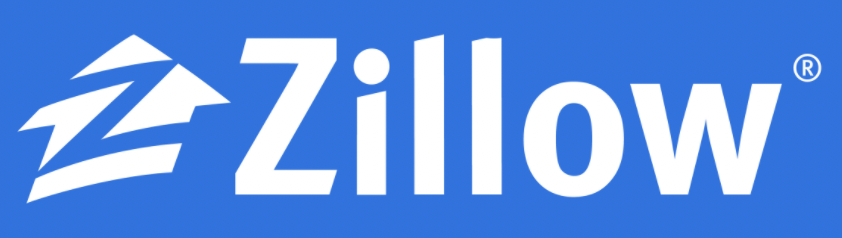

### What has brought us here today?

Log Error. Log error is based on the log of our Zestimate price minus the actual sales price of a home. But what is causing our errors? Thats what we are here to find out!

___

### What we hope to achieve
- Uncovering the drivers of the error in the Zestimate.
- Create recommendations on how to minimize log error.

___

### What we initially hypothesized
- Homes with heating systems are drivers of log error.
    - Because normally it is important but in southern California it is just nice to have but not a necessity.
- Latitude and Longitude are drivers of log error. 
    - Because one home may be in the hills, another may be on the coast, another may be in the dessert.
- Living in Los Angeles may be causing log error. 
    - Because of the majorly different economic standings within the area.

___

### What we ended up finding

..........

___

### What we learned from our findings

.........

___

### Our recommendation for you

..........

___

## Import Needed Materials

In [1]:
import wrangle
import explore

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


___

## Acquire Data

We acquire this data using the Zillow database found in the Codeup sequel server.

We joined specific tables onto our main data set (properties_2017). We also made specific parameters, within sequel, to fit our teams needs for this project.

In [2]:
df = wrangle.get_zillow_data()

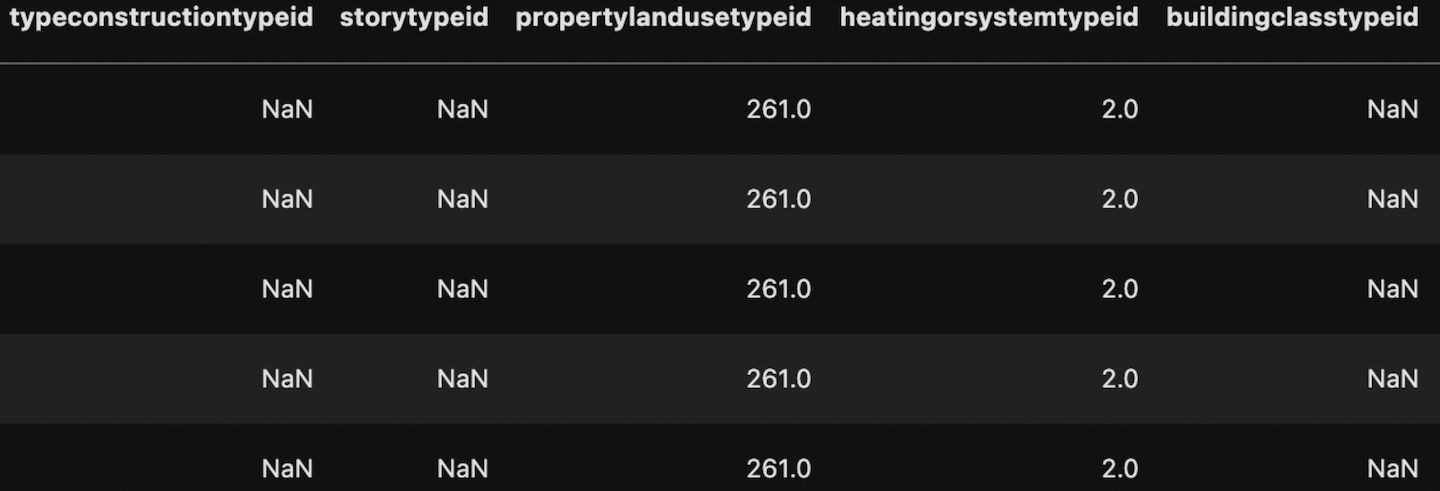

What's wrong with this?
- There are WAY to many missing values.
- The column names are sometimes too long and pushed together.
- Some columns are not helpful for what we need the data for.

___

## Clean the Data

In [3]:
df = wrangle.clean_zillow(df)

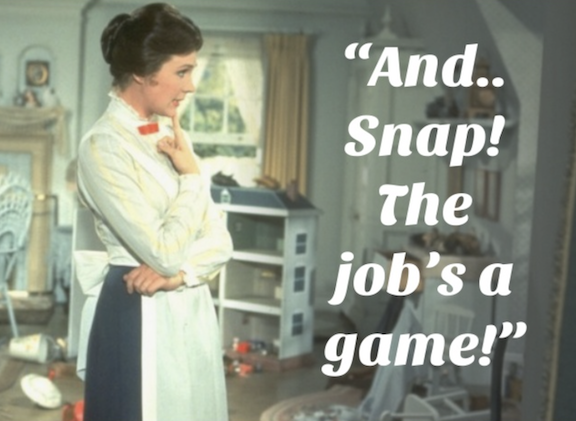

It actually wasn't as fast as a **snap**, it took some time.

In order to make the data work for us, like Ms.Poppins made the toys clean themselves, we had to put in some work.

- Here we:
    - Dop columns and rows with 50% or more null values 
    - Replace NULL values
    - Encode features
    - Create new features
    - Drop features
    - Rename features
    - Turn some features into binary features
    - Change some features to integers
    - Handle outliers
        - Using IQR rule
    - Bin some larger features

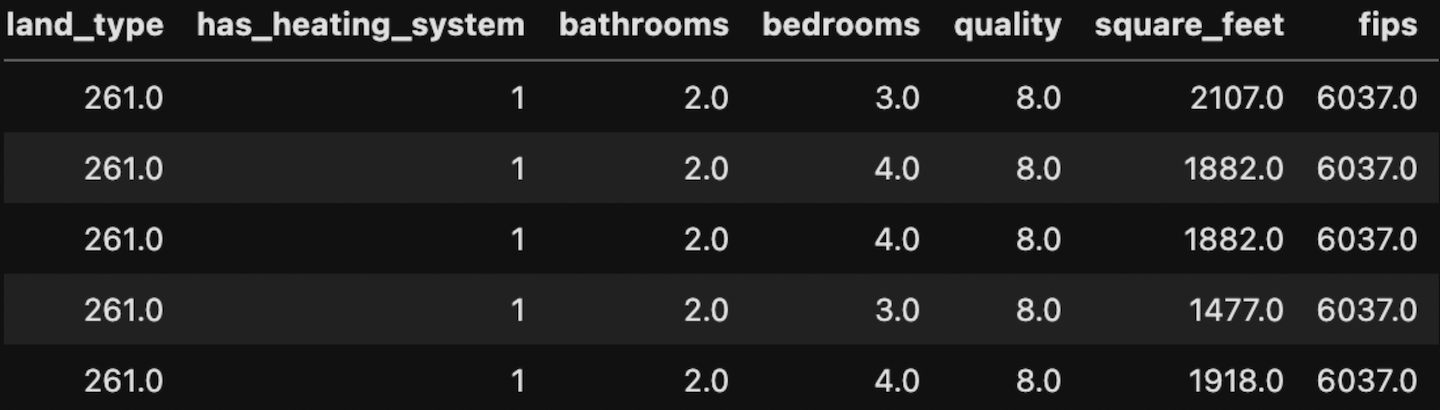

___

- From there we :
    - Split the data into train, validate, and test
    - Split train, validate, and test into X and y
    - Scaled the data
    
For further detail on the code used for cleaning, splitting, and scaling please see our wrangle.py found in our github repository.

In [4]:
train, validate, test = wrangle.split_zillow(df)

In [5]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

# Let's Start Exploring!

### Explore Logerror

To start things off we needed to take a look at our log error. 
- How often are we acccurate? How often are we slightly over? Under? How about how often we are way off? 

*That is what we aimed to answer here.*

In [ ]:
explore.explore_logerror(train)

Above we can see that there does seem to be a lot of accuracy with some error with our target variable. But how much of this accurate versus inaccurate?

- We found that there are far more accurate readings then inaccurate readings.
    - Accurate readings
        - 46,416 total
    - All other readings
        - 4,791 total

This means that only ~9.36% of our log error is inaccurate.

___

# Offically Exploring!

In [ ]:
explore.log_error_deep_dive(train)

Above we found that the percentage of our log errors in different counties is:
- **Accurate Percentages** (between -.15 and 0.15)
    - ~69% in Los Angeles
    - ~23% in Oragne County
    - ~8% in Ventura
- **Over Percentages** (between 0.15 and 1)
    - ~75% in Los Angeles
    - ~18% in Oragne County
    - ~7% in Ventura
- **Way Under Percentages** (between -1 and -5)
    - ~67% in Los Angeles
    - ~12% in Oragne County
    - ~21% in Ventura
- **Under Percentages** (between -0.15 and -1)
    - ~81% in Los Angeles
    - ~14% in Oragne County
    - ~5% in Ventura
- **Way Over Percentages** (between 1 and 5)
    - ~52% in Los Angeles
    - ~38% in Oragne County
    - ~10% in Ventura
    
This leads us the believe that there may not be just one driver of logerror. Many features may be driving the log error we do have, together.

In [ ]:
explore.logerror_pairplot(train)

In [ ]:
explore.closer_tax_plot(train)

# Takeaways
- Struture and land tax values ave a fair amount of "Way Over" valued homes and a slight amount of "Way Under" valued homes.

This leads me to believe that we may have success diving further into these features.

# Cluster Exploration

## Lets cluster using qulity, house age, and room count

In [ ]:
explore.quality_age_room_count_cluster(train)

## Takeaways:
- 

In [ ]:
explore.quality_age_room_count_relplot(train)

## Takeaways:
- 

In [ ]:
explore.get_dum_and_plot(train)

### Takeaways
- 

### From here we ran some tests.

We started with the Anova test where we rejected the null hypothesis that: 
- "____"

We than ran a t-test to find out which clusters were more important to logerror.
- By doing this we decided to keep:
    - ____
    - ____
    
From our tests these _____ clusters should have an effect on log error.

## Lets Cluster Using Structure Tax Value and Land Tax Value

In [ ]:
explore.taxes_cluster(train)

### Takeaways:
- We have very distinct clusters.
    - Both low tax values.
    - Medium structure and low tax values.
    - Low structure and medium land values.
    - High structure and high land tax values.

In [ ]:
explore.taxes_relplot(train)

### Takeaways
- 

### From here we ran some tests.

We started with the Anova test where we rejected the null hypothesis that: 
- "There is no signficant difference between the log error means of each individual cluster.

We than ran a t-test to find out which clusters were more important to logerror.
- By doing this we decided to keep:
    - low structure and low land tax value
    - medium structure and low land tax value
    
From our tests these two clusters should have an effect on log error.

## Lets Cluster Latitude, Longitude, and House Age

In [ ]:
explore.cluster_longitude_latitude_houseage(train)

### Takeaways
- 

In [ ]:
explore.get_dum_and_plot2(train)

### From here we ran some tests.

We started with the Anova test where we rejected the null hypothesis that: 
- "____"

We than ran a t-test to find out which clusters were more important to logerror.
- By doing this we decided to keep:
    - ____
    - ____
    
From our tests these _____ clusters should have an effect on log error.

# Let's Model These Bad Boys

But we need to focus our data on what we think is causing logerror.

In [ ]:
train, validate, test = wrangle.predict_cluster_taxes(train, validate, test)
train, validate, test = wrangle.get_dummy_taxes_cluster(train, validate, test)
train, validate, test = wrangle.prep_taxes_clusters(train, validate, test)

In [6]:

train, validate, test = wrangle.predict_cluster_taxes(train, validate, test)
train, validate, test = wrangle.get_dummy_taxes_cluster(train, validate, test)
train, validate, test = wrangle.prep_taxes_clusters(train, validate, test)

train, validate, test = wrangle.start_quality_houseage_cluster(train, validate, test)
train, validate, test = wrangle.predict_cluster_quality_houseage_roomcount(train, validate, test)
train, validate, test = wrangle.get_dummy_quality_houseage_roomcount_cluster(train, validate, test)
train, validate, test = wrangle.prep_quality_houseage_roomcount_clusters(train, validate, test)

train, validate, test = wrangle.start_longitude_latitude_houseage(train, validate, test)
train, validate, test = wrangle.predict_cluster_longitude_latitude_houseage(train, validate, test)
train, validate, test = wrangle.get_dummy_longitude_latitude_houseage_cluster(train, validate, test)
train, validate, test = wrangle.prep_longitude_latitude_houseage_clusters(train, validate, test)

ValueError: Length of 'prefix' (12290) did not match the length of the columns being encoded (1).

In [ ]:
explore.focused_zillow(train, validate, test)

In [ ]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split_train_validate_test(train, validate, test)

In [15]:
validate.shape

(12290, 34)

In [12]:
train, validate, test = wrangle.predict_cluster_taxes(train, validate, test)

In [16]:
test.shape

(10242, 34)

In [19]:
import pandas as pd

def get_dummy_taxes_cluster(train):
    dummy_df =  pd.get_dummies(train)['taxes_cluster']
    dummy_df.columns = ['low_structure_and_land_tax', 'drop1',
                        'drop2', 'medium_structure_low_land_tax', 
                        'drop4', 'drop5']
    train = pd.concat([train, dummy_df], axis=1)
    train = train.drop(['drop1', 'drop2', 'drop4', 'drop5', 'taxes_cluster'], axis=1)
    return train
get_dummy_taxes_cluster(train)

KeyError: "['drop1' 'drop2' 'drop4' 'drop5' 'taxes_cluster'] not found in axis"

### First we needed to established a baseline accuracy to work with.

We decided to move forward with a median Baseline which had:
- RMSE in sample of 0.16
- RMSE out of sample of 0.15

### Then we had to choose a model

After creating models for:
- Linear Regression
    - In sample: 0.15698
    - Out sample: 0.15186
- LassoLars
    - In sample: 0.01234
    - Out sample:0.01153
- Tweedie Regressor
    - In sample: 0.01234
    - Out sample: 0.01153
- Polynomial with a degree of 2
    - In sample: 0.01228
    - Out sample: 0.01154
- Polynomial with a degree of 3
    - In sample: 0.01228
    - Out sample: 0.01154
    
### We decided to move forward with the Linear Regeression model.

In [ ]:
explore.OLS_Model(X_train, y_train, X_validate, y_validate)

In [ ]:
def ols_actual_vs_predicted(X_train, y_train, X_validate, y_validate):
    # y_validate.head()
    plt.figure(figsize=(16,8))
    plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
    plt.annotate("Baseline: Predict Using Median", (16, 9.5))
    plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
    plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
    plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm3,
                alpha=.5, color="darkturquoise", s=100, label="Model 3rd degree Polynomial")
    plt.legend()
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Where are predictions more extreme? More modest?")
    # plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
    # plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
    plt.show()